<a href="https://colab.research.google.com/github/MahmoudEl-sherbiny/DEPI/blob/main/Classification_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [325]:
features = features = [
    "ID number",
    "Diagnosis",
    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean",
    "smoothness_mean",
    "compactness_mean",
    "concavity_mean",
    "concave points_mean",
    "symmetry_mean",
    "fractal_dimension_mean",
    "radius_se",
    "texture_se",
    "perimeter_se",
    "area_se",
    "smoothness_se",
    "compactness_se",
    "concavity_se",
    "concave points_se",
    "symmetry_se",
    "fractal_dimension_se",
    "radius_worst",
    "texture_worst",
    "perimeter_worst",
    "area_worst",
    "smoothness_worst",
    "compactness_worst",
    "concavity_worst",
    "concave points_worst",
    "symmetry_worst",
    "fractal_dimension_worst"
]

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                 comment='#', sep=',',names=features)

In [326]:
df

,ID number,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID number                569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [328]:
df.drop(columns="ID number", inplace=True)

<Axes: >

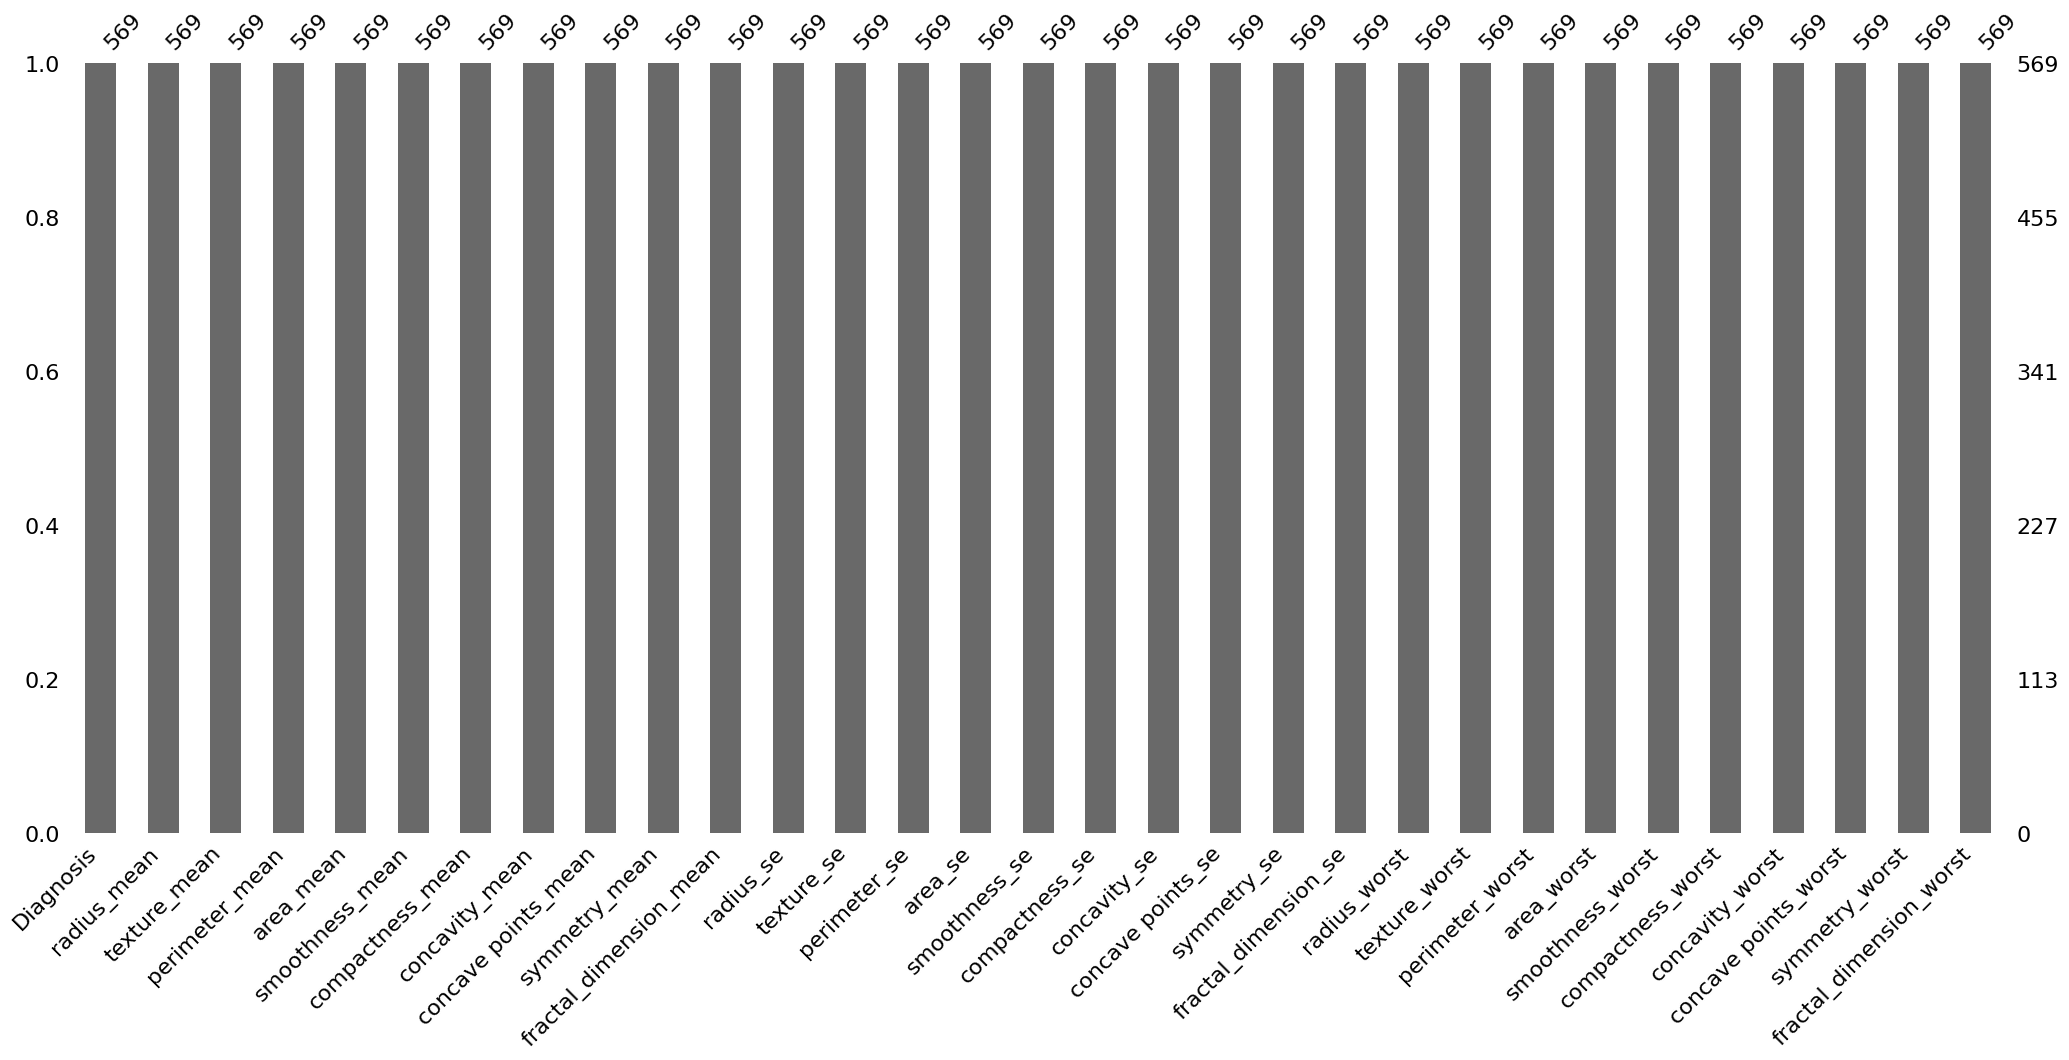

In [329]:
msno.bar(df)

In [330]:
print(f"Number of Null Values = {df.isna().sum().sum()}")
print(f"Number of duplicated rows = {df.duplicated().sum()}")
print(f"Shape of Data --> {df.shape}")

Number of Null Values = 0
Number of duplicated rows = 0
Shape of Data --> (569, 31)


In [331]:
df["Diagnosis"].value_counts()

,count
Diagnosis,
B,357
M,212


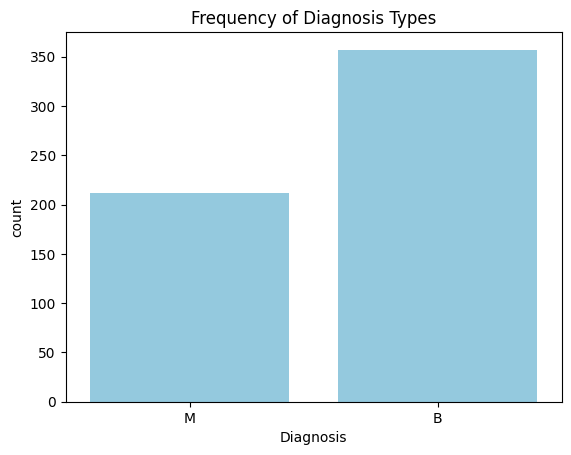

In [332]:
# Countplot for Diagosis
sns.countplot(x="Diagnosis", data=df, color="skyblue")
plt.title("Frequency of Diagnosis Types")
plt.show()

*   There is an imblance class here item M --> 212   B -->375
*   Benign Class is the dominant Class


In [333]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [334]:
df["Diagnosis"] = df["Diagnosis"].map({"B": 0, "M": 1})


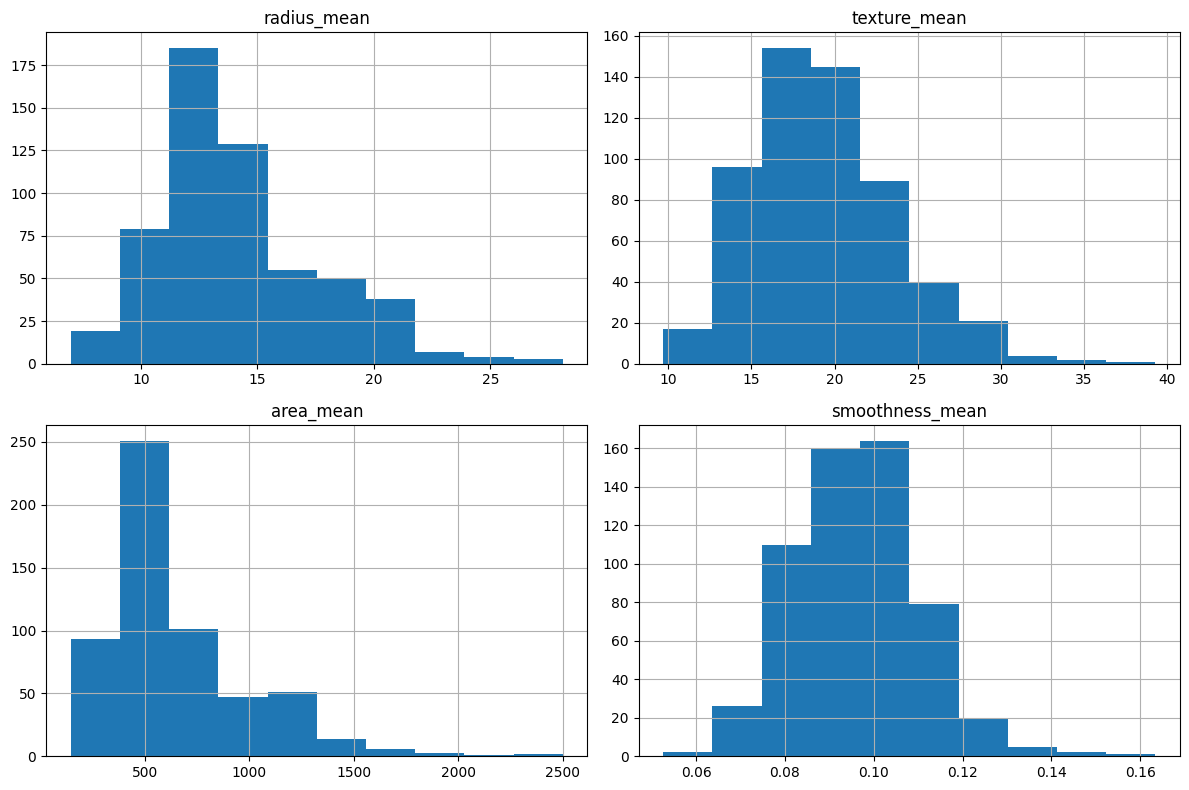

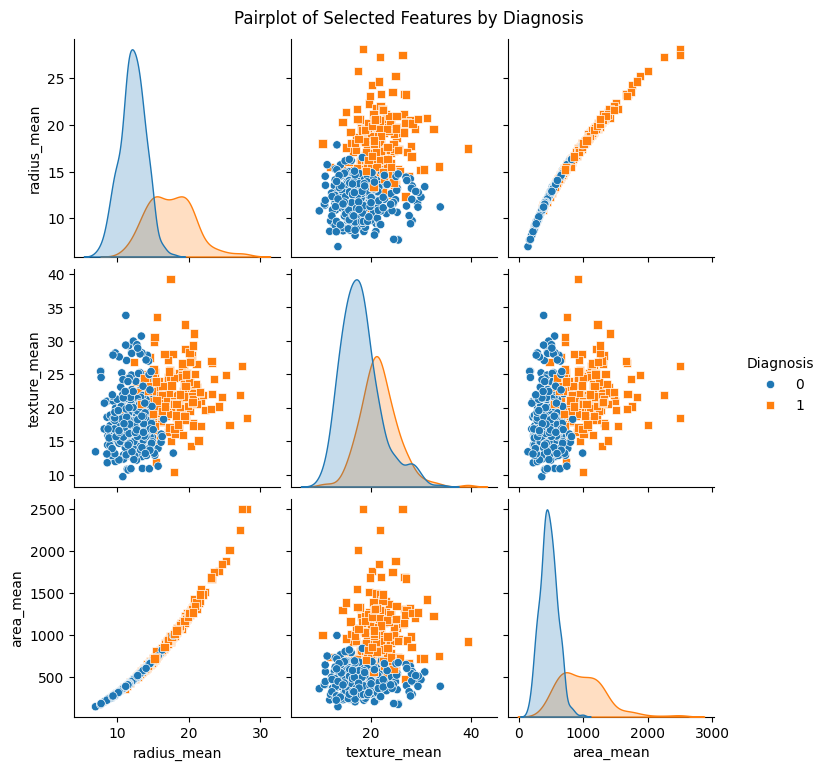

In [335]:
features_for_hist = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean']
df[features_for_hist].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

features_for_scatter = ['radius_mean', 'texture_mean', 'area_mean']
sns.pairplot(df, vars=features_for_scatter, hue='Diagnosis', markers=["o", "s"])
plt.suptitle("Pairplot of Selected Features by Diagnosis", y=1.02)
plt.show()

<Axes: >

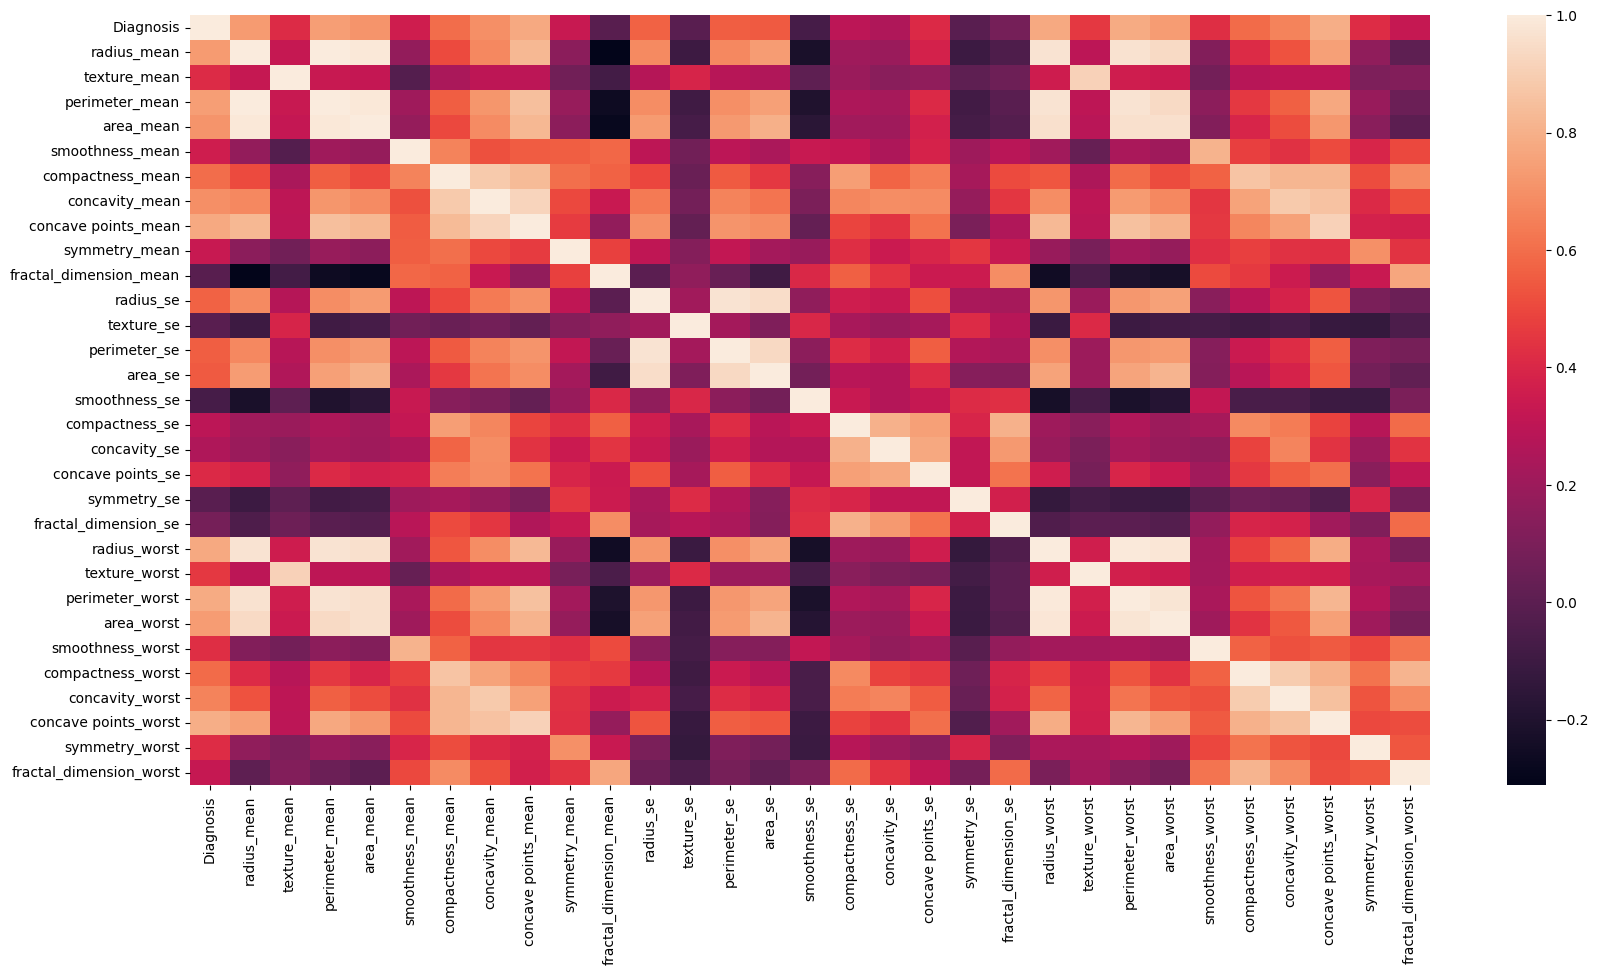

In [336]:
# Relation between Features and Target
corr_matrix  = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=False)

1. There are a lot of Featues Numeric so I will display all realtion with target variable to can demonstrate this correlation and define the most features have highest correlation


In [337]:
# top_features = corr_matrix[corr_matrix["Diagnosis"] >=0.60]["Diagnosis"].sort_values(ascending=False)
# Make data lekaged

In [338]:
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

In [339]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


In [340]:
# 2) do correlation only on training
corr_matrix = pd.concat([X_train, y_train], axis=1).corr()

In [341]:
top_features = corr_matrix[corr_matrix["Diagnosis"] >=0.60]["Diagnosis"].drop("Diagnosis").index
top_features

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

In [342]:

X_train = X_train[top_features]
X_test = X_test[top_features]

In [343]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [350]:
logistic_model = LogisticRegression(class_weight="balanced", random_state=42, penalty="l2", C=500)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(C=500, class_weight='balanced', random_state=42)

In [351]:
# Evaluation of Training
y_train_pred = logistic_model.predict(X_train_scaled)
cm_train = confusion_matrix(y_train, y_train_pred)


In [352]:
# Evaluation of Testing
y_pred_test = logistic_model.predict(X_test_scaled)
cm_test = confusion_matrix(y_test, y_pred_test)

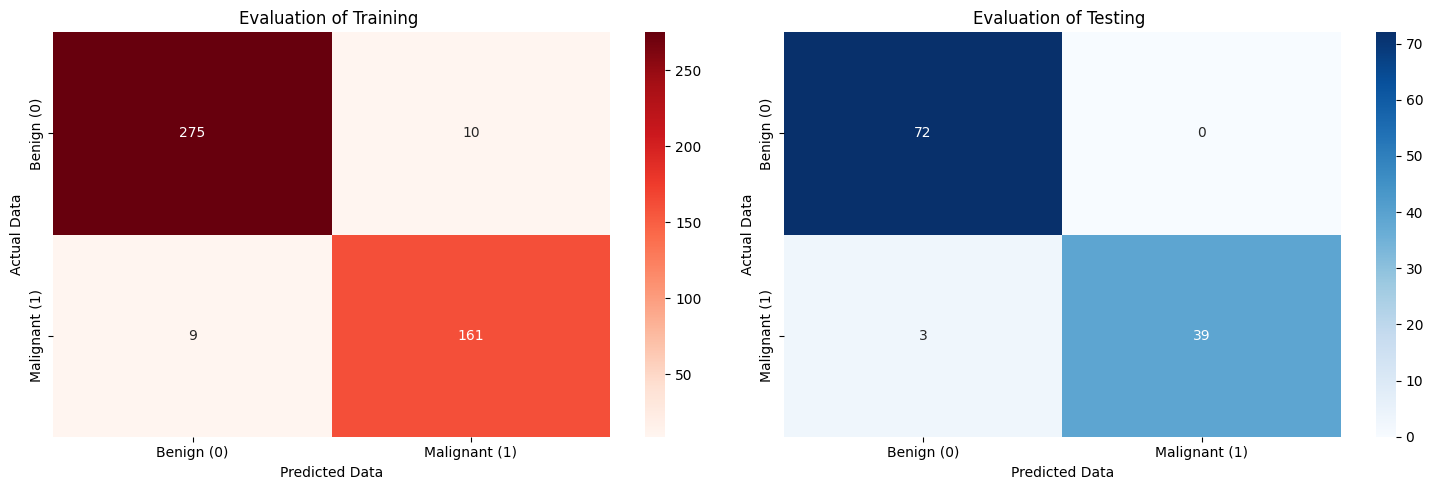

In [353]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap="Reds", xticklabels=['Benign (0)', 'Malignant (1)'], yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title("Evaluation of Training ")
plt.ylabel('Actual Data')
plt.xlabel('Predicted Data')

plt.subplot(1,2,2)
sns.heatmap(cm_test, annot=True, cmap="Blues", fmt='d', xticklabels=['Benign (0)', 'Malignant (1)'], yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title("Evaluation of Testing ")
plt.ylabel('Actual Data')
plt.xlabel('Predicted Data')


plt.tight_layout()
plt.show()

1. Model has a good Perofrmance on training and testing

In [354]:
# Classification Report for Training
print(classification_report(y_train, y_train_pred))
print("#####################################################################")
# Classification Report for Testing
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       285
           1       0.94      0.95      0.94       170

    accuracy                           0.96       455
   macro avg       0.95      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455

#####################################################################
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



*  The model demonstrates excellent performance with precision, recall, and F1-scores all around 0.99.
*  Both classes (0 and 1) are classified almost equally well, showing no sign of class imbalance issues.


AUC Score: 0.9983


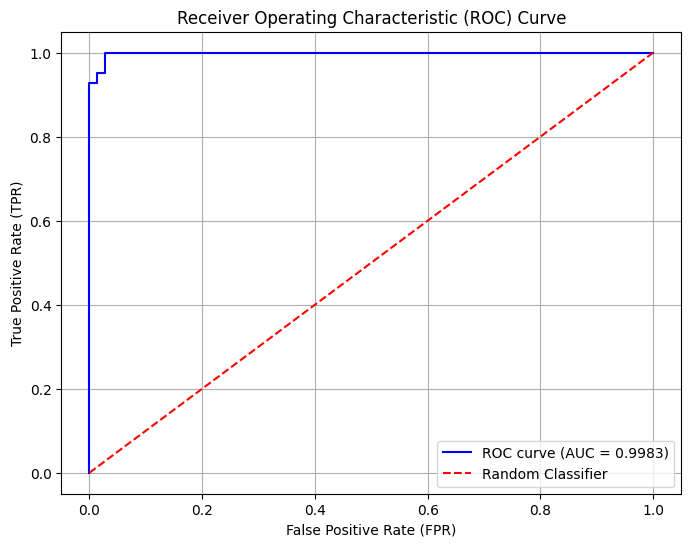

In [355]:
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC Score: {auc_score:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

the ROC curve shows an AUC of 0.999, indicating that the model has an almost perfect ability to distinguish between positive and negative cases.